#### Generative Art: Spiral waves
by Hamed Shah-Hosseini, Twitter:@chekaad, Instagram:@ostad.ai
<br>https://github.com/ostad-ai/Generative-Art

In [46]:
import numpy as np 
from matplotlib import pyplot as plt
from numba import njit,prange 
from math import sin,atan2,sqrt,pi

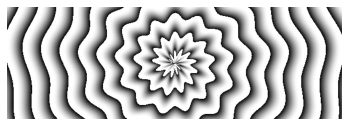

In [47]:
width,height=600,200; aspect=width/height
image=np.zeros((height,width),dtype='int')
@njit 
def clamp(x,minVal,maxVal):
    return max(minVal,min(x,maxVal))
@njit
def smoothstep(low,high,x):
    t=(x-low)/(high-low) 
    t=clamp(t,0.,1.)
    return t*t*(3.-2*t)
@njit
def fract(x): 
    return x-int(x)
@njit
def circle_like(Nspiral,scale,image):
    uv=np.zeros(2)
    for x in prange(width):
        for y in prange(height):
            uv[:2]=x/width,y/height
            uv-=.5
            uv[0]*=aspect;uv*=scale 
            d=sqrt(uv[0]**2+uv[1]**2)
            angle=atan2(uv[1],uv[0])
            d-=angle/(2*pi)-.5
            d+=.1*sin(13*angle)
            d=fract(Nspiral*d)
            image[y,x]=int(255*smoothstep(-.8,.8,d))
def run(Nspiral,scale):
    circle_like(Nspiral,scale,image)
    plt.imshow(image,cmap='gray')
    plt.axis('off')
    plt.show()    
run(Nspiral=2,scale=3.)